In [1]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
ee.Authenticate()
ee.Initialize()

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [3]:
# Define the area of interest (AOI) for York Region, Ontario
aoi = ee.Geometry.Polygon([
    [
        [-79.6653, 43.7434],  # Southwest
        [-79.6653, 44.3083],  # Northwest
        [-79.1789, 44.3083],  # Northeast
        [-79.1789, 43.7434],  # Southeast
        [-79.6653, 43.7434]   # Back to Southwest (close the polygon)
    ]
])


# Access the CHIRPS dataset
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD')

# Define the range of years
start_year = 2004
end_year = 2023

# Prepare an empty list to store the yearly data
all_years_data = []

# Loop through each year
for year in range(start_year, end_year + 1):
    # Loop through each month (1 to 12) within the year
    for month in range(1, 13):
        # Define the date range for the current month
        month_start = f'{year}-{month:02d}-01'
        month_end = f'{year}-{month:02d}-28'  # Approximation for months
        
        # Filter the dataset for the specific month and year
        monthly_image = chirps.filterBounds(aoi).filterDate(month_start, month_end).mean()
        
        # Reduce the image to get the mean precipitation over the AOI
        mean_rainfall = monthly_image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=aoi,
            scale=5000  # Adjust scale as needed
        )
        
        # Extract the mean precipitation value
        rainfall_value = mean_rainfall.get('precipitation').getInfo()
        
        # Append year, month, and precipitation to the list
        all_years_data.append({
            'Year': year,
            'Month': month,
            'Mean Rainfall (mm)': rainfall_value
        })

# Convert the yearly data to a pandas DataFrame
rainfall_df = pd.DataFrame(all_years_data)

# Print the DataFrame to check
print(rainfall_df)

# Save to CSV
rainfall_df.to_csv('Rainfall_2004_2023_YorkRegion.csv', index=False)

     Year  Month  Mean Rainfall (mm)
0    2004      1           10.514205
1    2004      2            5.944490
2    2004      3           10.926549
3    2004      4           12.944859
4    2004      5           18.335625
..    ...    ...                 ...
235  2023      8           10.271501
236  2023      9            5.419253
237  2023     10           11.175223
238  2023     11           10.857448
239  2023     12           13.756914

[240 rows x 3 columns]


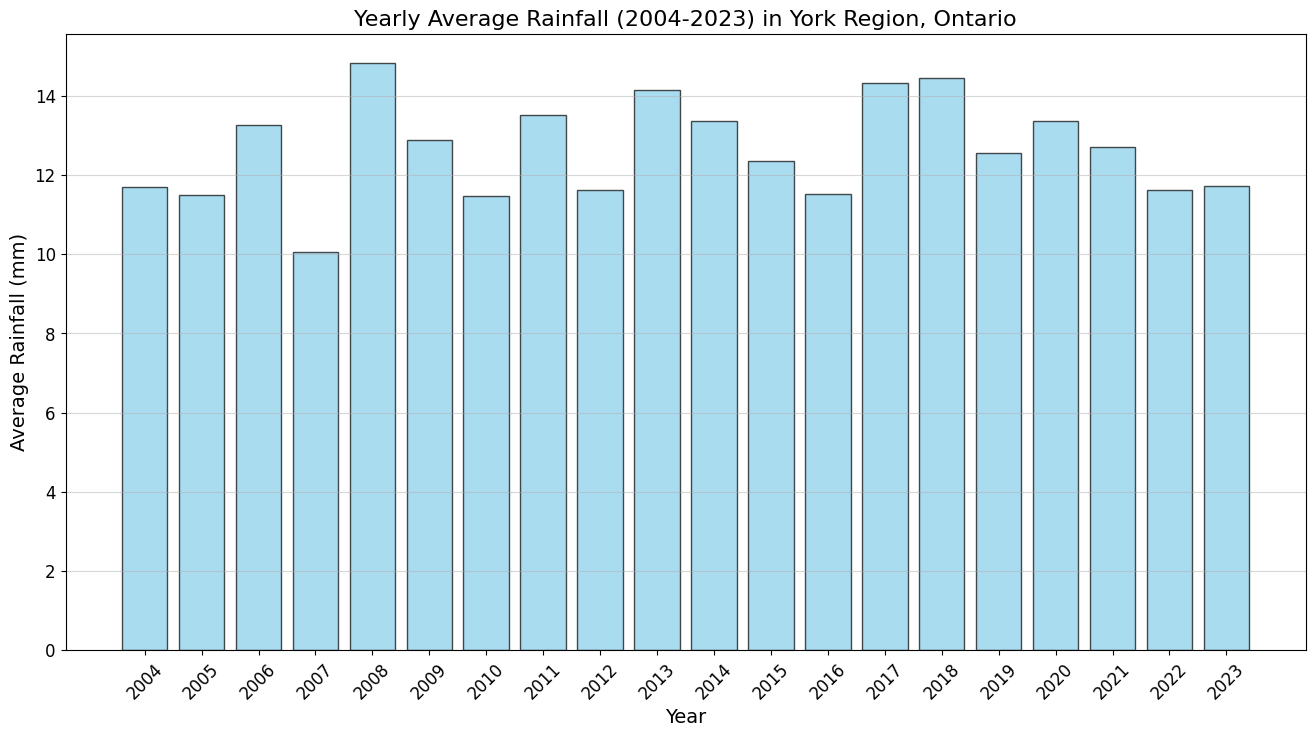

In [6]:
# load the csv data
rainfall_df = pd.read_csv(r'C:\Users\Tedi\Rainfall_2004_2023_YorkRegion.csv')

# calculate the average rainfall for each year
yearly_avg_rainfall = rainfall_df.groupby('Year')['Mean Rainfall (mm)'].mean().reset_index()

# plot the bar graph
plt.figure(figsize=(16, 8))
plt.bar(
    yearly_avg_rainfall['Year'],
    yearly_avg_rainfall['Mean Rainfall (mm)'],
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)
#customize the plot
plt.title('Yearly Average Rainfall (2004-2023) in York Region, Ontario', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)
plt.xticks(yearly_avg_rainfall['Year'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
# save the plot to a file
plt.savefig('YorkRegion_yearly_avg_rainfall_bar_chart.png', dpi=300, bbox_inches='tight')
# show the plot
plt.show()